Submitted by: Jean Philip L. Juachon (jean_juachon@dlsu.edu.ph / github.com/jeanjuachon)


For this assessment, I aim to:<br> 
1.) Determine the most appropriate kind of customer segmentation for a company using their online retail data<br>
2.) Determine the key metrics that they should consider based on the given segmentation

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
origData = pd.read_excel("Online Retail.xlsx")

In [39]:
df = origData.copy()

In [40]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Based on the dataset above, the shape of our dataframe is 541909 rows and 8 columns, we can also see here that <br>
each row represents a transaction per customer. Thus, moving forward, since the our goal is to determine the segments per customer <br>
we have to get a summarized view of our customers.

## Pre Processing and EDA

In [41]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


By describing the data, we can see that the mean quantity count is 9.5 and the mean amount is 4.6,<br>
however, there we can also see that there are weird values such as negative in quantity and unit price. <br>
It is also noticeable that the CustomerID is not equal to the number of rows, thus indicating that there are missing values.

In [42]:
#Because of these findings, we check which columns contain missing values and how many are these missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [43]:
#We see from above that there are 135k rows without any customer ID, let's check its %
print(f"Missing CustID %: {((df['CustomerID'].isna().sum()) / df.shape[0]) * 100}")

Missing CustID %: 24.926694334288598


Upon finding out that only 25% of the dataset have missing values, I have decided to drop these as we still have a good amount<br>
of data to work with and also, there is no way to properly interpolate columns with regards to IDs.

In [44]:
df.dropna(inplace = True)
df.isna().sum() #double check

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [45]:
#Check the current shape of the data and how many unique customers do we have
print(f"Current shape of the data: {df.shape[0]}")
uniqueID = df["CustomerID"].nunique() #Since we have already removed the missing values, we can now see how many actual customers are we currently working with
print(f"Out of {df.shape[0]} orders, we only have {uniqueID} unique customers")

Current shape of the data: 406829
Out of 406829 orders, we only have 4372 unique customers


In [46]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Now that the dataset is clean, we can now do an analysis and create/determine segments of customers. <br>
We plan to use two methodologies for this experiment to compare the results of each approach as the first methodology will rely<br>
on arbitrary choices and other business assumptions in determining the number of segments, <br>while on the other hand, the second methodology will rely purely on a mathematical basis.<br>

The first methodology is the RFM or the **Recency, Frequency, and Monetory Analysis**.<br>
The second methodology will be by using an unsupervised machine learning algorithm called **KMeans clustering.**<br>

By using this methodologies, we can identify our customers based on who recently purchased, <br>
how many times have they purchased from us, and how much have they spent. Thus, by having these details, we can roughly have a bird's eye view about the **stickiness** of our customers.

## Recency, Frequency, Monetary Analysis

In [47]:
#Add 1 to the current date, assume that the data were analyzed 1 day after the most recent transaction
import datetime as dt 
curr_date = pd.to_datetime(df['InvoiceDate'].max())+ dt.timedelta(days=1)

In [48]:
curr_date

Timestamp('2011-12-10 12:50:00')

In [49]:
#Create features that may help such as TotalAmount
df['TotalAmount'] = df["Quantity"] * df["UnitPrice"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [50]:
#Get the RFM of each customer here based on the "current date"
cust_group = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x:(curr_date - x.max()).days,
                                            'TotalAmount': 'sum',
                                            'InvoiceNo':'count'})
cust_group.head()

,InvoiceDate,TotalAmount,InvoiceNo
CustomerID,,,
12346.0,326,0.00,2
12347.0,2,4310.00,182
12348.0,75,1797.24,31
12349.0,19,1757.55,73
12350.0,310,334.40,17


In [51]:
#Rename the Values to RFM
cust_group = cust_group.rename(columns = {"InvoiceDate":"Recency", "InvoiceNo":"Frequency", "TotalAmount" : "Monetary"})
cust_group = cust_group.reset_index()
cust_group.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326,0.00,2
1,12347.0,2,4310.00,182
2,12348.0,75,1797.24,31
3,12349.0,19,1757.55,73
4,12350.0,310,334.40,17


Now that we have the Recency, Monetary, and Frequency of each customer, <br>
we can label these values per quartile

In [52]:
recency_quartile = pd.qcut(cust_group["Recency"], 4, labels = range(4,0,-1)) #We have to inverse this as we want the most recent customers to have higher recency score
cust_group = cust_group.assign(r_quartile = recency_quartile.values.astype("int64"))

monetary_quartile = pd.qcut(cust_group["Monetary"], 4, labels = range(1,5,1))
cust_group = cust_group.assign(m_quartile = monetary_quartile.values.astype("int64"))

frequency_quartile = pd.qcut(cust_group["Frequency"], 4, labels = range(1,5,1))
cust_group = cust_group.assign(f_quartile = frequency_quartile.values.astype("int64"))

cust_group.head() #We now have a data frame with the RFM values and their quartiles

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile
0,12346.0,326,0.00,2,1,1,1
1,12347.0,2,4310.00,182,4,4,4
2,12348.0,75,1797.24,31,2,4,2
3,12349.0,19,1757.55,73,3,4,3
4,12350.0,310,334.40,17,1,2,1


In [53]:
cust_group["RFMscore"] = cust_group['r_quartile'] + cust_group["m_quartile"] + cust_group['f_quartile']

In [54]:
cust_group["Segment"] = cust_group['r_quartile'].astype(str) + cust_group['m_quartile'].astype(str) + cust_group['f_quartile'].astype(str)
cust_group

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile,RFMscore,Segment
0,12346.0,326,0.00,2,1,1,1,3,111
1,12347.0,2,4310.00,182,4,4,4,12,444
2,12348.0,75,1797.24,31,2,4,2,8,242
3,12349.0,19,1757.55,73,3,4,3,10,343
4,12350.0,310,334.40,17,1,2,1,4,121
...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,180.60,10,1,1,1,3,111
4368,18281.0,181,80.82,7,1,1,1,3,111
4369,18282.0,8,176.60,13,4,1,1,6,411
4370,18283.0,4,2094.88,756,4,4,4,12,444


In [78]:
score_count = cust_group["RFMscore"].value_counts().sort_index()
score_count = pd.DataFrame(score_count).reset_index().rename(columns = {"index":"rfmScore", "RFMscore":"CustIDcount"})
score_count

,rfmScore,CustIDcount
0,3,392
1,4,391
2,5,517
3,6,468
4,7,447
5,8,467
6,9,411
7,10,440
8,11,368
9,12,471


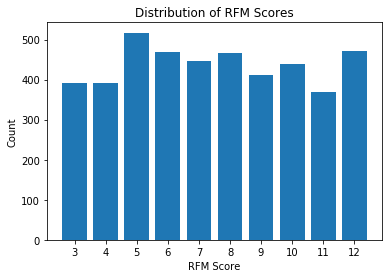

In [77]:
plt.bar(score_count['rfmScore'], score_count['CustIDcount'])
plt.xticks(ticks = range(3,13))
plt.title("Distribution of RFM Scores")
plt.xlabel("RFM Score")
plt.ylabel("Count")
plt.plot()
plt.show()

In [89]:
#We will get the quartile of each score here, this will be the basis on how we will label/group the scores
score_quartile = pd.qcut(score_count["rfmScore"], 4, labels = range(1,5,1))
score_count = score_count.assign(sc_quartile = score_quartile.values.astype("int64"))
score_count

,rfmScore,CustIDcount,sc_quartile
0,3,392,1
1,4,391,1
2,5,517,1
3,6,468,2
4,7,447,2
5,8,467,3
6,9,411,3
7,10,440,4
8,11,368,4
9,12,471,4


In [82]:
def segmenter(value):
    if value <= 5: #RFM 3,4,5
        return "Classic"
    elif (value > 5) and (value <= 7): #RFM 6,7,8
        return "Silver"
    elif (value > 7) and (value <= 9): #RFM 9,10,11
        return "Gold"
    else:
        return "Platinum" #RFM >11

In [83]:
cust_group['Tier'] = cust_group['RFMscore'].apply(segmenter)
cust_group.head()

,CustomerID,Recency,Monetary,Frequency,r_quartile,m_quartile,f_quartile,RFMscore,Segment,Tier
0,12346.0,326,0.00,2,1,1,1,3,111,Classic
1,12347.0,2,4310.00,182,4,4,4,12,444,Platinum
2,12348.0,75,1797.24,31,2,4,2,8,242,Gold
3,12349.0,19,1757.55,73,3,4,3,10,343,Platinum
4,12350.0,310,334.40,17,1,2,1,4,121,Classic


In [86]:
tier_group = cust_group.groupby(['Tier']).agg({"CustomerID":"count",
                                               "Recency":"mean",
                                             "Monetary":"mean",
                                             "Frequency":"mean"})

tier_group = tier_group.reset_index()
tier_group

,Tier,CustomerID,Recency,Monetary,Frequency
0,Classic,1300,193.189231,239.096862,14.968462
1,Gold,878,54.076310,1159.545333,67.313212
2,Platinum,1279,19.125098,5017.437451,232.373729
3,Silver,915,86.714754,605.307750,33.948634


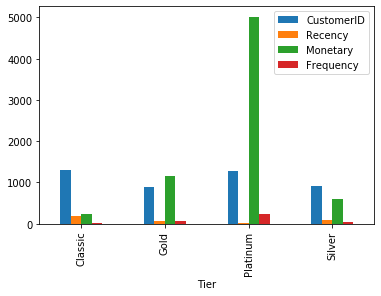

In [100]:
tier_group.plot(x = "Tier",
               kind = "bar",
               stacked = False)

## K-means method

In [1]:
df2 = cust_group[["CustomerID", "Recency", "Monetary", "Frequency"]]

NameError: name 'cust_group' is not defined

In [123]:
df2

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326,0.00,2
1,12347.0,2,4310.00,182
2,12348.0,75,1797.24,31
3,12349.0,19,1757.55,73
4,12350.0,310,334.40,17
...,...,...,...,...
4367,18280.0,278,180.60,10
4368,18281.0,181,80.82,7
4369,18282.0,8,176.60,13
4370,18283.0,4,2094.88,756


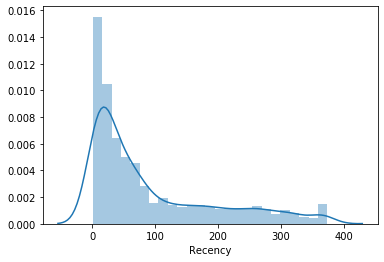

In [130]:
import seaborn as sns
sns.distplot(df2["Recency"])

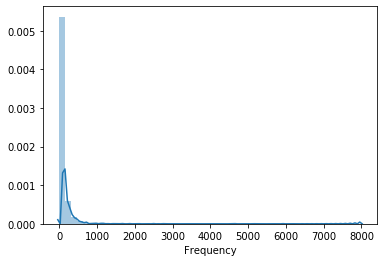

In [131]:
sns.distplot(df2["Frequency"])

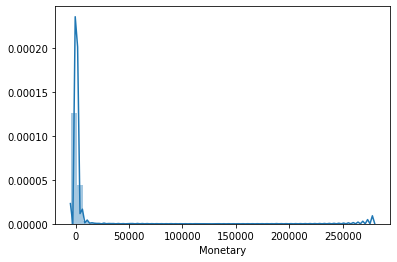

In [132]:
sns.distplot(df2["Monetary"])

Based on the graphs above, we see that the features that we will be using are skewed <br>
Thus, we need to transform the data to reduce it's skewness, afterwards, if the data is still skewed,<br>
I believe we can defend this by the Central Limit Theorem

In [133]:
df2.describe()

,CustomerID,Recency,Monetary,Frequency
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.047118,1898.459701,93.053294
std,1722.390705,100.765435,8219.345141,232.471608
min,12346.000000,1.000000,-4287.630000,1.000000
25%,13812.750000,17.000000,293.362500,17.000000
50%,15300.500000,50.000000,648.075000,42.000000
75%,16778.250000,143.000000,1611.725000,102.000000
max,18287.000000,374.000000,279489.020000,7983.000000


In [159]:
df3 = df2[["Recency", "Monetary", "Frequency"]]
df3["Monetary"] = df3["Monetary"] + 1

/Users/philip/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
for col in ["Recency", "Frequency"]:
    df3[col] = np.log(df3[col])
df3

/Users/philip/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Recency,Monetary,Frequency
0,5.786897,1.00,0.693147
1,0.693147,4311.00,5.204007
2,4.317488,1798.24,3.433987
3,2.944439,1758.55,4.290459
4,5.736572,335.40,2.833213
...,...,...,...
4367,5.627621,181.60,2.302585
4368,5.198497,81.82,1.945910
4369,2.079442,177.60,2.564949
4370,1.386294,2095.88,6.628041


In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df3)
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = ["Recency", "Monetary", "Frequency"]
scaled_df

,Recency,Monetary,Frequency
0,1.402917,-0.231001,-2.230272
1,-2.075135,0.293432,1.133419
2,0.399593,-0.012316,-0.186462
3,-0.537936,-0.017146,0.452198
4,1.368554,-0.190312,-0.634452
...,...,...,...
4367,1.294161,-0.209026,-1.030135
4368,1.001152,-0.221167,-1.296103
4369,-1.128562,-0.209513,-0.834493
4370,-1.601849,0.023900,2.195304


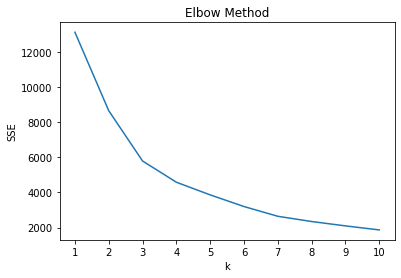

In [162]:
from sklearn.cluster import KMeans
sse = list()
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 2021)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11,1), sse)
plt.xticks(ticks = range(1,11))
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()

In [163]:
from sklearn.metrics import silhouette_score
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, random_state = 2021)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print(f"n_cluster {i}, Silhouette Score: {silhouette_avg}")

n_cluster 2, Silhouette Score: 0.404681623540063
n_cluster 3, Silhouette Score: 0.40902462823168817
n_cluster 4, Silhouette Score: 0.3258273303189558
n_cluster 5, Silhouette Score: 0.3294337033843643
n_cluster 6, Silhouette Score: 0.3325051999300746
n_cluster 7, Silhouette Score: 0.3273879292457607
n_cluster 8, Silhouette Score: 0.33141256031420857
n_cluster 9, Silhouette Score: 0.32081211058813025
n_cluster 10, Silhouette Score: 0.32661308738682115


In [181]:
kmeans = KMeans(n_clusters = 3, random_state = 2021)
kmeans.fit(scaled_df)
clusters = kmeans.labels_
df2['Clusters'] = clusters

/Users/philip/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [182]:
df2['Clusters'].value_counts()

0    2455
1    1911
2       6
Name: Clusters, dtype: int64

In [183]:
df2

,CustomerID,Recency,Monetary,Frequency,Clusters
0,12346.0,326,0.00,2,0
1,12347.0,2,4310.00,182,1
2,12348.0,75,1797.24,31,0
3,12349.0,19,1757.55,73,1
4,12350.0,310,334.40,17,0
...,...,...,...,...,...
4367,18280.0,278,180.60,10,0
4368,18281.0,181,80.82,7,0
4369,18282.0,8,176.60,13,1
4370,18283.0,4,2094.88,756,1
